## Twitter Analysis of DBG Account

In [9]:
import tweepy, codecs
import matplotlib.pyplot as plt

In [11]:
consumer_key = "cQcORsTZjTozZ53"
consumer_secret = "Ro6p8oxhOj9kcI3vdeXlqetaWCZ1O"
access_token ="3224795051-L4CQAiU8QjpcPYVH"
access_token_secret ="FYcR91CokylrtL"

auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [13]:
dbgaccount = api.get_user("DeutscheBoerse")

In [15]:
dbgaccount.followers_count

19509

In [17]:
dbgaccount.statuses_count

8835

In [19]:
dbgaccount.favourites_count

4246

In [21]:
tweets= api.user_timeline(id = "DeutscheBoerse",result_type = "recent", count = 20000)

In [23]:
for i in tweets:
    print(i.text)

@Qontigofinance: Pet Care, Video Gaming, Health Care: #Qontigo’s #thematic #indices family is growing. https://t.co/9tx7HLYo5U https://t…
Happy 20th birthday, #ETFs! It all started with two exchange-traded #index funds, listed on our @Xetra market – and… https://t.co/wc8r82BLe2
With this year’s start of the Securities Financing Transaction Regulation (SFTR), REGIS-TR aims to provide an exper… https://t.co/99XhF40lRg
RT @EurexGroup: Our recently launched #futures on STOXX® USA 500 ESG-X (FSUS) (Bloomberg: QFCA Index) are now available for #trading to U.S…
RT @Qontigofinance: Happy 20th birthday to #ETFs in Europe: Two decades ago, in April, the first European exchange-traded funds were listed…
Looking back at 20 years of ETFs: Stephan Kraus, responsible for the #ETF segment at Deutsche Börse, talks with us… https://t.co/Jnh0C7xpey
Our reading recommendation for today's #HomeOffice break! https://t.co/UCaPfFSGpg
RT @Qontigofinance: #MondayMotivation: We are proud that #STOXX was named 'B

In [25]:
import pandas as pd
def timeline_df(tweets):
    idler = [tweet.id for tweet in tweets]
    df = pd.DataFrame(idler, columns = ["id"])

    df["id"] = list(map(lambda tweet: tweet.id,tweets))
    df["created_at"] = [tweet.created_at for tweet in tweets]
    df["text"] = [tweet.text for tweet in tweets]
    df["retweeted"] = list(map(lambda tweet: tweet.retweeted, tweets))
    df["favorite_count"] = [tweet.favorite_count for tweet in tweets]
    df["retweet_count"] = [tweet.retweet_count for tweet in tweets]
    df["source"] = [tweet.source for tweet in tweets]
    df["location"] = [tweet.author.location for tweet in tweets]
    df["screen_name"] = [tweet.author.screen_name for tweet in tweets]

    return df

In [27]:
h = timeline_df(tweets)

In [29]:
h.sort_values("favorite_count", ascending = False).head()

,id,created_at,text,retweeted,favorite_count,retweet_count,source,location,screen_name
134,1201792222338924545,2019-12-03 09:16:08,Proud to have achieved a milestone for #DLT im...,False,60,33,Twitter Web App,Worldwide,DeutscheBoerse
142,1196733843975204865,2019-11-19 10:15:57,We proudly announce that together with @Swissc...,False,25,4,Twitter Web App,Worldwide,DeutscheBoerse
198,1179414375570067464,2019-10-02 15:14:34,Decentralised market infrastructure – the futu...,False,18,10,Twitter Web Client,Worldwide,DeutscheBoerse
179,1184366754837024775,2019-10-16 07:13:33,🇩🇪@KristinaJeromin eröffnet den #sfgd2019. Fol...,False,18,3,Twitter for iPhone,Worldwide,DeutscheBoerse
23,1267348557490728960,2020-06-01 06:53:36,"Wishing our customers and colleagues, their fr...",False,16,5,Twitter Web App,Worldwide,DeutscheBoerse


In [31]:
h.sort_values("retweet_count", ascending = False).head()

,id,created_at,text,retweeted,favorite_count,retweet_count,source,location,screen_name
129,1204290625673277445,2019-12-10 06:43:54,RT @inside_r3: Check out this recent video tes...,False,0,35,Twitter for iPhone,Worldwide,DeutscheBoerse
134,1201792222338924545,2019-12-03 09:16:08,Proud to have achieved a milestone for #DLT im...,False,60,33,Twitter Web App,Worldwide,DeutscheBoerse
65,1239973210453463040,2020-03-17 17:53:45,RT @FESEBrussels: See our latest press release...,False,0,20,Twitter for iPhone,Worldwide,DeutscheBoerse
66,1239885143864741893,2020-03-17 12:03:48,We have no plans of market closure. Quite the ...,False,11,11,Twitter Web App,Worldwide,DeutscheBoerse
198,1179414375570067464,2019-10-02 15:14:34,Decentralised market infrastructure – the futu...,False,18,10,Twitter Web Client,Worldwide,DeutscheBoerse


In [33]:
h.sort_values("retweet_count", ascending = False)[["text","favorite_count"
]].head()

,text,favorite_count
129,RT @inside_r3: Check out this recent video tes...,0
134,Proud to have achieved a milestone for #DLT im...,60
65,RT @FESEBrussels: See our latest press release...,0
66,We have no plans of market closure. Quite the ...,11
198,Decentralised market infrastructure – the futu...,18


In [35]:
%config InlineBackend.figure_format = "retina"
import seaborn as sns
import matplotlib.pyplot as plt

(10, 65)

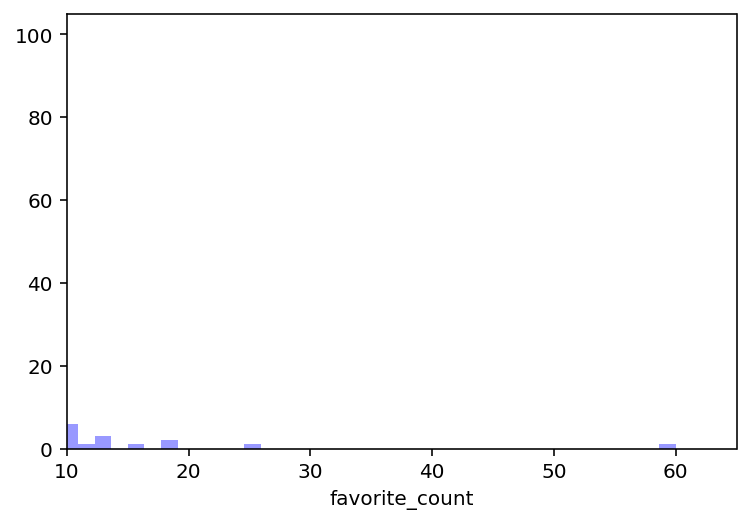

In [37]:
sns.distplot(h.favorite_count, kde=False, color = "blue"); #favorite counts
plt.xlim(10,65)

(0, 40)

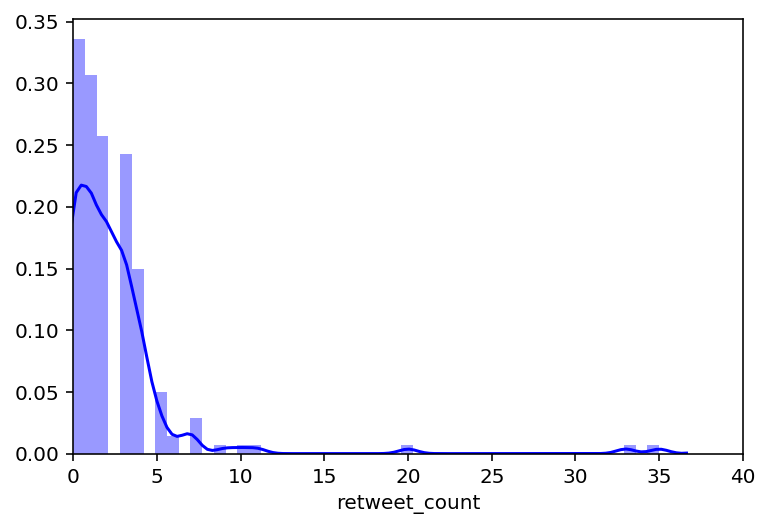

In [39]:
sns.distplot(h.retweet_count, color = "blue") #how many retweet dbg gets
plt.xlim(00,40)

In [41]:
h["tweet_saat"] = h["created_at"].apply(lambda x: x.strftime("%H")) ##which hours the account send tweets

In [43]:
h["tweet_saat"] = pd.to_numeric(h["tweet_saat"])
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              200 non-null    int64         
 1   created_at      200 non-null    datetime64[ns]
 2   text            200 non-null    object        
 3   retweeted       200 non-null    bool          
 4   favorite_count  200 non-null    int64         
 5   retweet_count   200 non-null    int64         
 6   source          200 non-null    object        
 7   location        200 non-null    object        
 8   screen_name     200 non-null    object        
 9   tweet_saat      200 non-null    int64         
dtypes: bool(1), datetime64[ns](1), int64(4), object(4)
memory usage: 14.4+ KB


# Which hours DBG generally tweets

(0, 24)

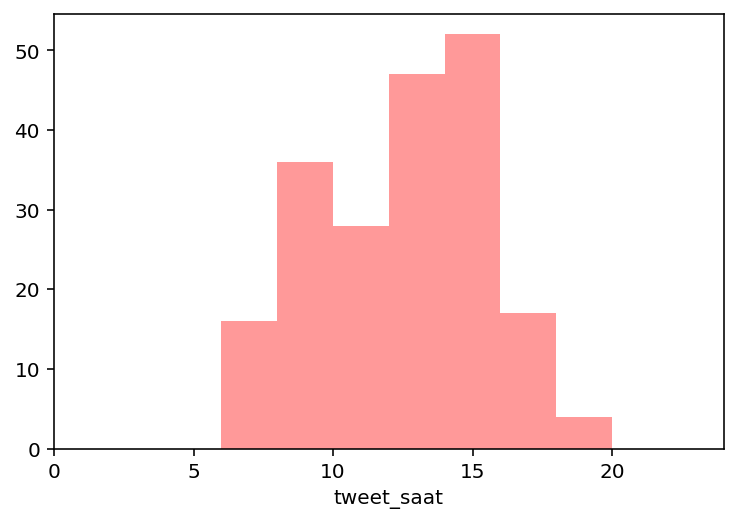

In [45]:
sns.distplot(h.tweet_saat,kde = False,color = "red",kde_kws={"color": "k", "lw": 3, "label": "KDE"}) # Looks like around 12-15
plt.xlim(00,24)


In [132]:
h["days"] = h["created_at"].dt.weekday

In [143]:
h.days.replace([0, 1], ["monday", "tuesday"], inplace=True)
h.days.replace([2, 3], ["wednesday", "thursday"], inplace=True)
h.days.replace([4, 5], ["friday", "saturday"], inplace=True)
h.days.replace([6], ["sunday"], inplace=True)

In [144]:
h.head()

,id,created_at,text,retweeted,favorite_count,retweet_count,source,location,screen_name,tweet_saat,gunler,days
0,1278226201019105281,2020-07-01 07:17:29,As #Germany is taking over the EU Council’s pr...,False,7,1,Twitter Web App,Worldwide,DeutscheBoerse,7,wednesday,wednesday
1,1276133595988594694,2020-06-25 12:42:13,RT @EurexGroup: We’re delighted to announce th...,False,0,4,Twitter Web App,Worldwide,DeutscheBoerse,12,thursday,thursday
2,1275814502546759681,2020-06-24 15:34:15,RT @EurexGroup: We warmly welcome Tammo Diemer...,False,0,2,Twitter Web App,Worldwide,DeutscheBoerse,15,wednesday,wednesday
3,1275059211450212354,2020-06-22 13:33:00,"As of 1 July, Deutsche Börse Data Services is ...",False,2,0,Twitter Web App,Worldwide,DeutscheBoerse,13,monday,monday
4,1273199156543328256,2020-06-17 10:21:48,@EurexGroup clears the first interest rate swa...,False,1,1,Twitter Web App,Worldwide,DeutscheBoerse,10,wednesday,wednesday


In [145]:
day_freq=h.groupby("days").count()["id"]

# Which days DBG account send tweets

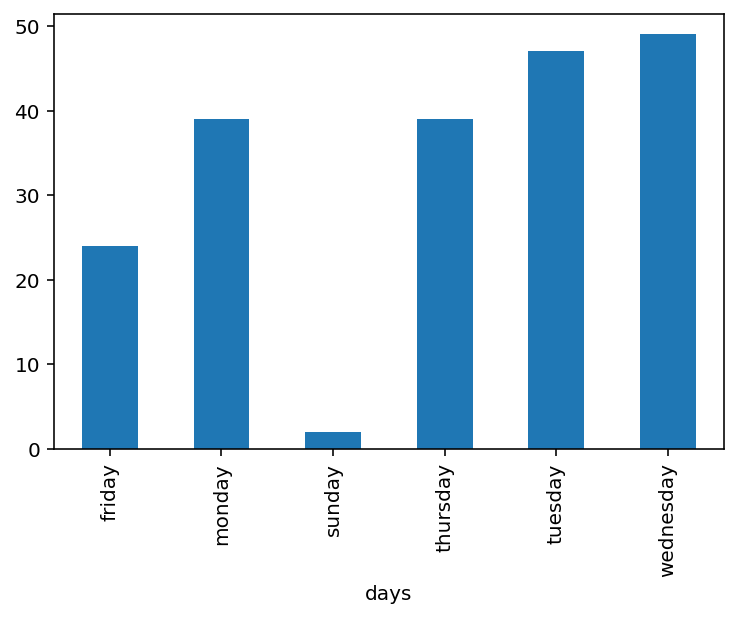

In [146]:
day_freq.plot.bar(x = "days", y = "id")  

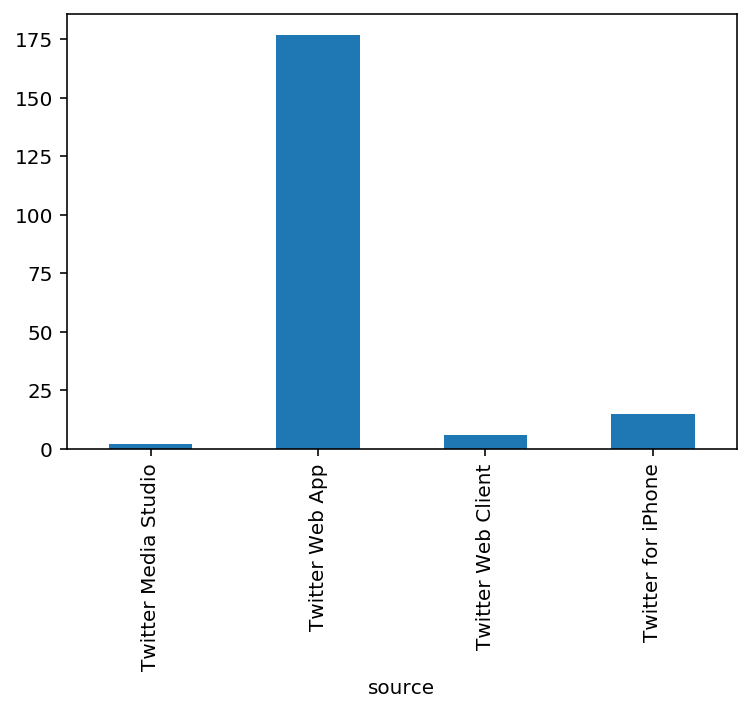

In [57]:
source_freq = h.groupby("source").count()["id"]

source_freq.plot.bar()

In [59]:
#h.groupby(["source","tweet_saat","gunler"])[["tweet_saat"]].count().head(50)

## Which followers or friends are more active for DBG

In [61]:
dbg = api.get_user(id = "DeutscheBoerse", count = 350, request_type = "recent")

In [63]:
for friend in dbg.followers():
    print(friend.screen_name)

LeeChongg
vivekvarma427
agentur_z
KelvyTapia
davidh_23
Bardnet
ReneGutzmann
Matthia61038367
edgars83656365
Krew376
vannakkol
bertbondnet
trapp_ma
Flo_bckr
hamed01670699
GilcaValentino
Johntrad23
echtes
zitnikv
LucaJoHaerms


In [108]:
friends = dbg.friends()
followers=dbg.followers()

In [67]:
import pandas as pd
def followers_df(takipci):
    idler = [kisi.id for kisi in takipci]
    fl = pd.DataFrame(idler, columns = ["id"])

    fl["screen_name"] = [kisi.screen_name for kisi in takipci]
    fl["created_at"] = [kisi.created_at for kisi in takipci]
    fl["followers_count"] = [kisi.followers_count for kisi in takipci]
    fl["statutes_count"] = [kisi.statuses_count for  kisi in takipci]
    fl["favorite_count"] = [kisi.favourites_count for kisi in takipci]
    fl["friends_count"] = [kisi.friends_count for kisi in takipci]
    fl["location"] = [kisi.location for kisi in takipci]

    return fl

In [109]:
flw_dbg = followers_df(followers)

In [110]:
flw_dbg.head()

,id,screen_name,created_at,followers_count,statutes_count,favorite_count,friends_count,location
0,287670077,LeeChongg,2011-04-25 13:11:56,68,683,6,81,
1,289863716,vivekvarma427,2011-04-29 10:32:00,7,159,203,304,"Gujarat,india"
2,1278985806166753282,agentur_z,2020-07-03 09:36:09,0,0,0,9,
3,316753685,KelvyTapia,2011-06-13 22:37:58,92,123,9020,1722,Dominican Republic
4,456093537,davidh_23,2012-01-05 21:30:39,287,90,190,1546,


In [111]:
flw_dbg.shape

(20, 8)

In [112]:
flw_dbg["location"].value_counts(normalize= True)*100

                                  50.0
🇲🇽🇩🇪🏴󠁧🇬🇧🌐WORLDWIDEWEB              5.0
Phnom Penh,Cambodia.               5.0
Brno, Czech Republic               5.0
Gujarat,india                      5.0
Hamburg, Deutschland               5.0
Mannheim, Germany                  5.0
Deutschland                        5.0
vienna                             5.0
Dominican Republic                 5.0
Fürstenwalde/Spree, Deutschlan     5.0
Name: location, dtype: float64

In [113]:
aa= flw_dbg.groupby("location").count()["followers_count"]

In [114]:
flw_dbg.groupby("screen_name").agg({"friends_count":"mean"})

,friends_count
screen_name,
Bardnet,3279
Flo_bckr,4
GilcaValentino,39
Johntrad23,236
KelvyTapia,1722
Krew376,120
LeeChongg,81
LucaJoHaerms,28
Matthia61038367,99


In [116]:
#aa.plot.bar()

In [117]:
flw_dbg.index = flw_dbg["screen_name"]

In [ ]:
flw_dbg.head()

In [118]:
s_data = flw_dbg[["followers_count", "statutes_count"]]
s_data

,followers_count,statutes_count
screen_name,,
LeeChongg,68,683
vivekvarma427,7,159
agentur_z,0,0
KelvyTapia,92,123
davidh_23,287,90
Bardnet,642,58896
ReneGutzmann,1,2
Matthia61038367,21,4
edgars83656365,3,0


In [119]:
s_data["followers_count"] = s_data["followers_count"]+0.01   # Here I added 0.1 value.

In [122]:
s_data["statutes_count"] = s_data["statutes_count"]+0.01

In [123]:
s_data

,followers_count,statutes_count
screen_name,,
LeeChongg,0.072417,0.021597
vivekvarma427,0.007455,0.012700
agentur_z,0.000000,0.010000
KelvyTapia,0.097977,0.012088
davidh_23,0.305644,0.011528
Bardnet,0.683706,1.010000
ReneGutzmann,0.001065,0.010034
Matthia61038367,0.022364,0.010068
edgars83656365,0.003195,0.010000


In [121]:
s_data = s_data.apply(lambda x: (x-min(x))/(max(x)-min(x)))
s_data

,followers_count,statutes_count
screen_name,,
LeeChongg,0.072417,0.011597
vivekvarma427,0.007455,0.002700
agentur_z,0.000000,0.000000
KelvyTapia,0.097977,0.002088
davidh_23,0.305644,0.001528
Bardnet,0.683706,1.000000
ReneGutzmann,0.001065,0.000034
Matthia61038367,0.022364,0.000068
edgars83656365,0.003195,0.000000


In [125]:
score = s_data["followers_count"] * s_data["statutes_count"]

In [126]:
score.sort_values(ascending = False)

screen_name
Bardnet            0.690543
vannakkol          0.181642
echtes             0.018769
davidh_23          0.003524
bertbondnet        0.003442
trapp_ma           0.001883
LeeChongg          0.001564
KelvyTapia         0.001184
Matthia61038367    0.000225
Krew376            0.000202
GilcaValentino     0.000096
vivekvarma427      0.000095
zitnikv            0.000043
Johntrad23         0.000043
edgars83656365     0.000032
ReneGutzmann       0.000011
Flo_bckr           0.000000
hamed01670699      0.000000
agentur_z          0.000000
LucaJoHaerms       0.000000
dtype: float64

In [127]:
s_data["score"] = score

In [128]:
import numpy as np
s_data["segment"] = np.where(s_data["score"] >= score.median()+ score.std()/len(score),"A","B")

## Segmentation of our DBG account followers

In [129]:
s_data

,followers_count,statutes_count,score,segment
screen_name,,,,
LeeChongg,0.072417,0.021597,0.001564,B
vivekvarma427,0.007455,0.012700,0.000095,B
agentur_z,0.000000,0.010000,0.000000,B
KelvyTapia,0.097977,0.012088,0.001184,B
davidh_23,0.305644,0.011528,0.003524,B
Bardnet,0.683706,1.010000,0.690543,A
ReneGutzmann,0.001065,0.010034,0.000011,B
Matthia61038367,0.022364,0.010068,0.000225,B
edgars83656365,0.003195,0.010000,0.000032,B


In [149]:
! jupyter nbconvert --to html dbgaccount.ipynb

[NbConvertApp] Converting notebook dbgaccount.ipynb to html
[NbConvertApp] Writing 466125 bytes to dbgaccount.html
